## E-commerce Business Transaction
>Sales transaction of a UK-based e-commerce (online retail) for one year

## About Dataset
### Context
E-commerce has become a new channel to support businesses development. Through e-commerce, businesses can get access and establish a wider market presence by providing cheaper and more efficient distribution channels for their products or services. E-commerce has also changed the way people shop and consume products and services. Many people are turning to their computers or smart devices to order goods, which can easily be delivered to their homes.

### Content
This is a sales transaction data set of UK-based e-commerce (online retail) for one year. This London-based shop has been selling gifts and homewares for adults and children through the website since 2007. Their customers come from all over the world and usually make direct purchases for themselves. There are also small businesses that buy in bulk and sell to other customers through retail outlet channels.

The data set contains 500K rows and 8 columns. The following is the **description of each column**.

- TransactionNo (categorical): a six-digit unique number that defines each transaction. The letter “C” in the code indicates a cancellation.
- Date (numeric): the date when each transaction was generated.
- ProductNo (categorical): a five or six-digit unique character used to identify a specific product.
- Product (categorical): product/item name.
- Price (numeric): the price of each product per unit in pound sterling (£).
- Quantity (numeric): the quantity of each product per transaction. Negative values related to cancelled transactions.
- CustomerNo (categorical): a five-digit unique number that defines each customer.
- Country (categorical): name of the country where the customer resides.

There is a small percentage of order cancellation in the data set. Most of these cancellations were due to out-of-stock conditions on some products. Under this situation, customers tend to cancel an order as they want all products delivered all at once.

### Inspiration
Information is a main asset of businesses nowadays. The success of a business in a competitive environment depends on its ability to acquire, store, and utilize information. Data is one of the main sources of information. Therefore, data analysis is an important activity for acquiring new and useful information. Analyze this dataset and try to answer the following questions.

How was the sales trend over the months?
What are the most frequently purchased products?
How many products does the customer purchase in each transaction?
What are the most profitable segment customers?
Based on your findings, what strategy could you recommend to the business to gain more profit?

Photo by CardMapr on Unsplash

In [ ]:
# imports
import pandas as pd                 # Datenanalyse und -manipulation
import numpy as np                  # Numerische Berechnungen, Arrays
import matplotlib.pyplot as plt     # Plotten
import seaborn as sns               # Statistische Visualisierung
import scipy.stats as stats         # Statistische Tests
import sklearn                      # Machine Learning & Preprocessing

In [2]:
# create df, read csv
df = pd.read_csv("/Users/gerrik/Documents/business_analytics/business_analytics_project/data/Sales Transaction v.4a.csv")
# open df
df


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


In [3]:
# checking missing values
df.isna().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

In [4]:
# delete na value
df.dropna(inplace=True)
df.isna().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       0
Country          0
dtype: int64

In [5]:
# changing date time
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%d.%m.%Y')
df.head(2)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,09.12.2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,09.12.2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom


In [7]:
# export cleaned data as excel
df.to_excel("/Users/gerrik/Documents/business_analytics/business_analytics_project/data/cleaned_e-commerce_business_data.xlsx", index=False)

Überlegung:
1. UPT  
2. Verkäufe und Retouren unter berücksichtigung der Länder
3. Kundanzahl im Verlauf der Zeit (Abwanderung erkennen)
4. AOV (Averge Order Value) = Price/Index pro TranactionNo
5. Churn Rate (Kundenabwanderung)
6. Umsatz Tag/Woche/Monat/Jahr
7. Bestsellers Top20
8. Cross Sell Rate (Bon mit einem UPT höher als 2)
9. Upsell (Bon mit artikeln mit höheren Preis (guessing: bessere qualität der Produkte = höhere Preis))
10. Top 100 Kunden (Ranking-Echtzeit um ggf. Angebote einzureichen)

Hypothese
1. Während der Festlichkeiten wie Weihnachten (10.12.2019-24.10.2019) / chinesisches Neujahr(05.Feb 2019-19. Feb 2019) steigen die verkäufe
2. Die Retouren liegn bei unter 15%
3. Der UPT liegt in westlichen ländern höher

In [15]:
# UPT
# negative mengen ausschließen
df_filtered = df[df['Quantity'] > 0]

# UPT pro bon = summe der menge je bon (TransactionNo)
upt_pro_bon = df_filtered.groupby('TransactionNo')['Quantity'].sum().reset_index()

# spalte umbenennen für klarheit 
upt_pro_bon.columns = ['TransactionNo', 'UnitsPerTransaction']

print(upt_pro_bon.head())

  TransactionNo  UnitsPerTransaction
0        536365                   40
1        536366                   12
2        536367                   83
3        536368                   15
4        536369                    3


In [18]:
# verkäufe vs retouren (false/true)
df['Sales'] = df['Quantity'] > 0
df['Cancelation'] = df['Quantity'] <= 0
df


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Sales,Cancelation
0,581482,09.12.2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,True,False
1,581475,09.12.2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,True,False
2,581475,09.12.2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,True,False
3,581475,09.12.2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,True,False
4,581475,09.12.2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,True,False
...,...,...,...,...,...,...,...,...,...,...
536345,C536548,01.12.2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany,False,True
536346,C536548,01.12.2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany,False,True
536347,C536548,01.12.2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany,False,True
536348,C536548,01.12.2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany,False,True


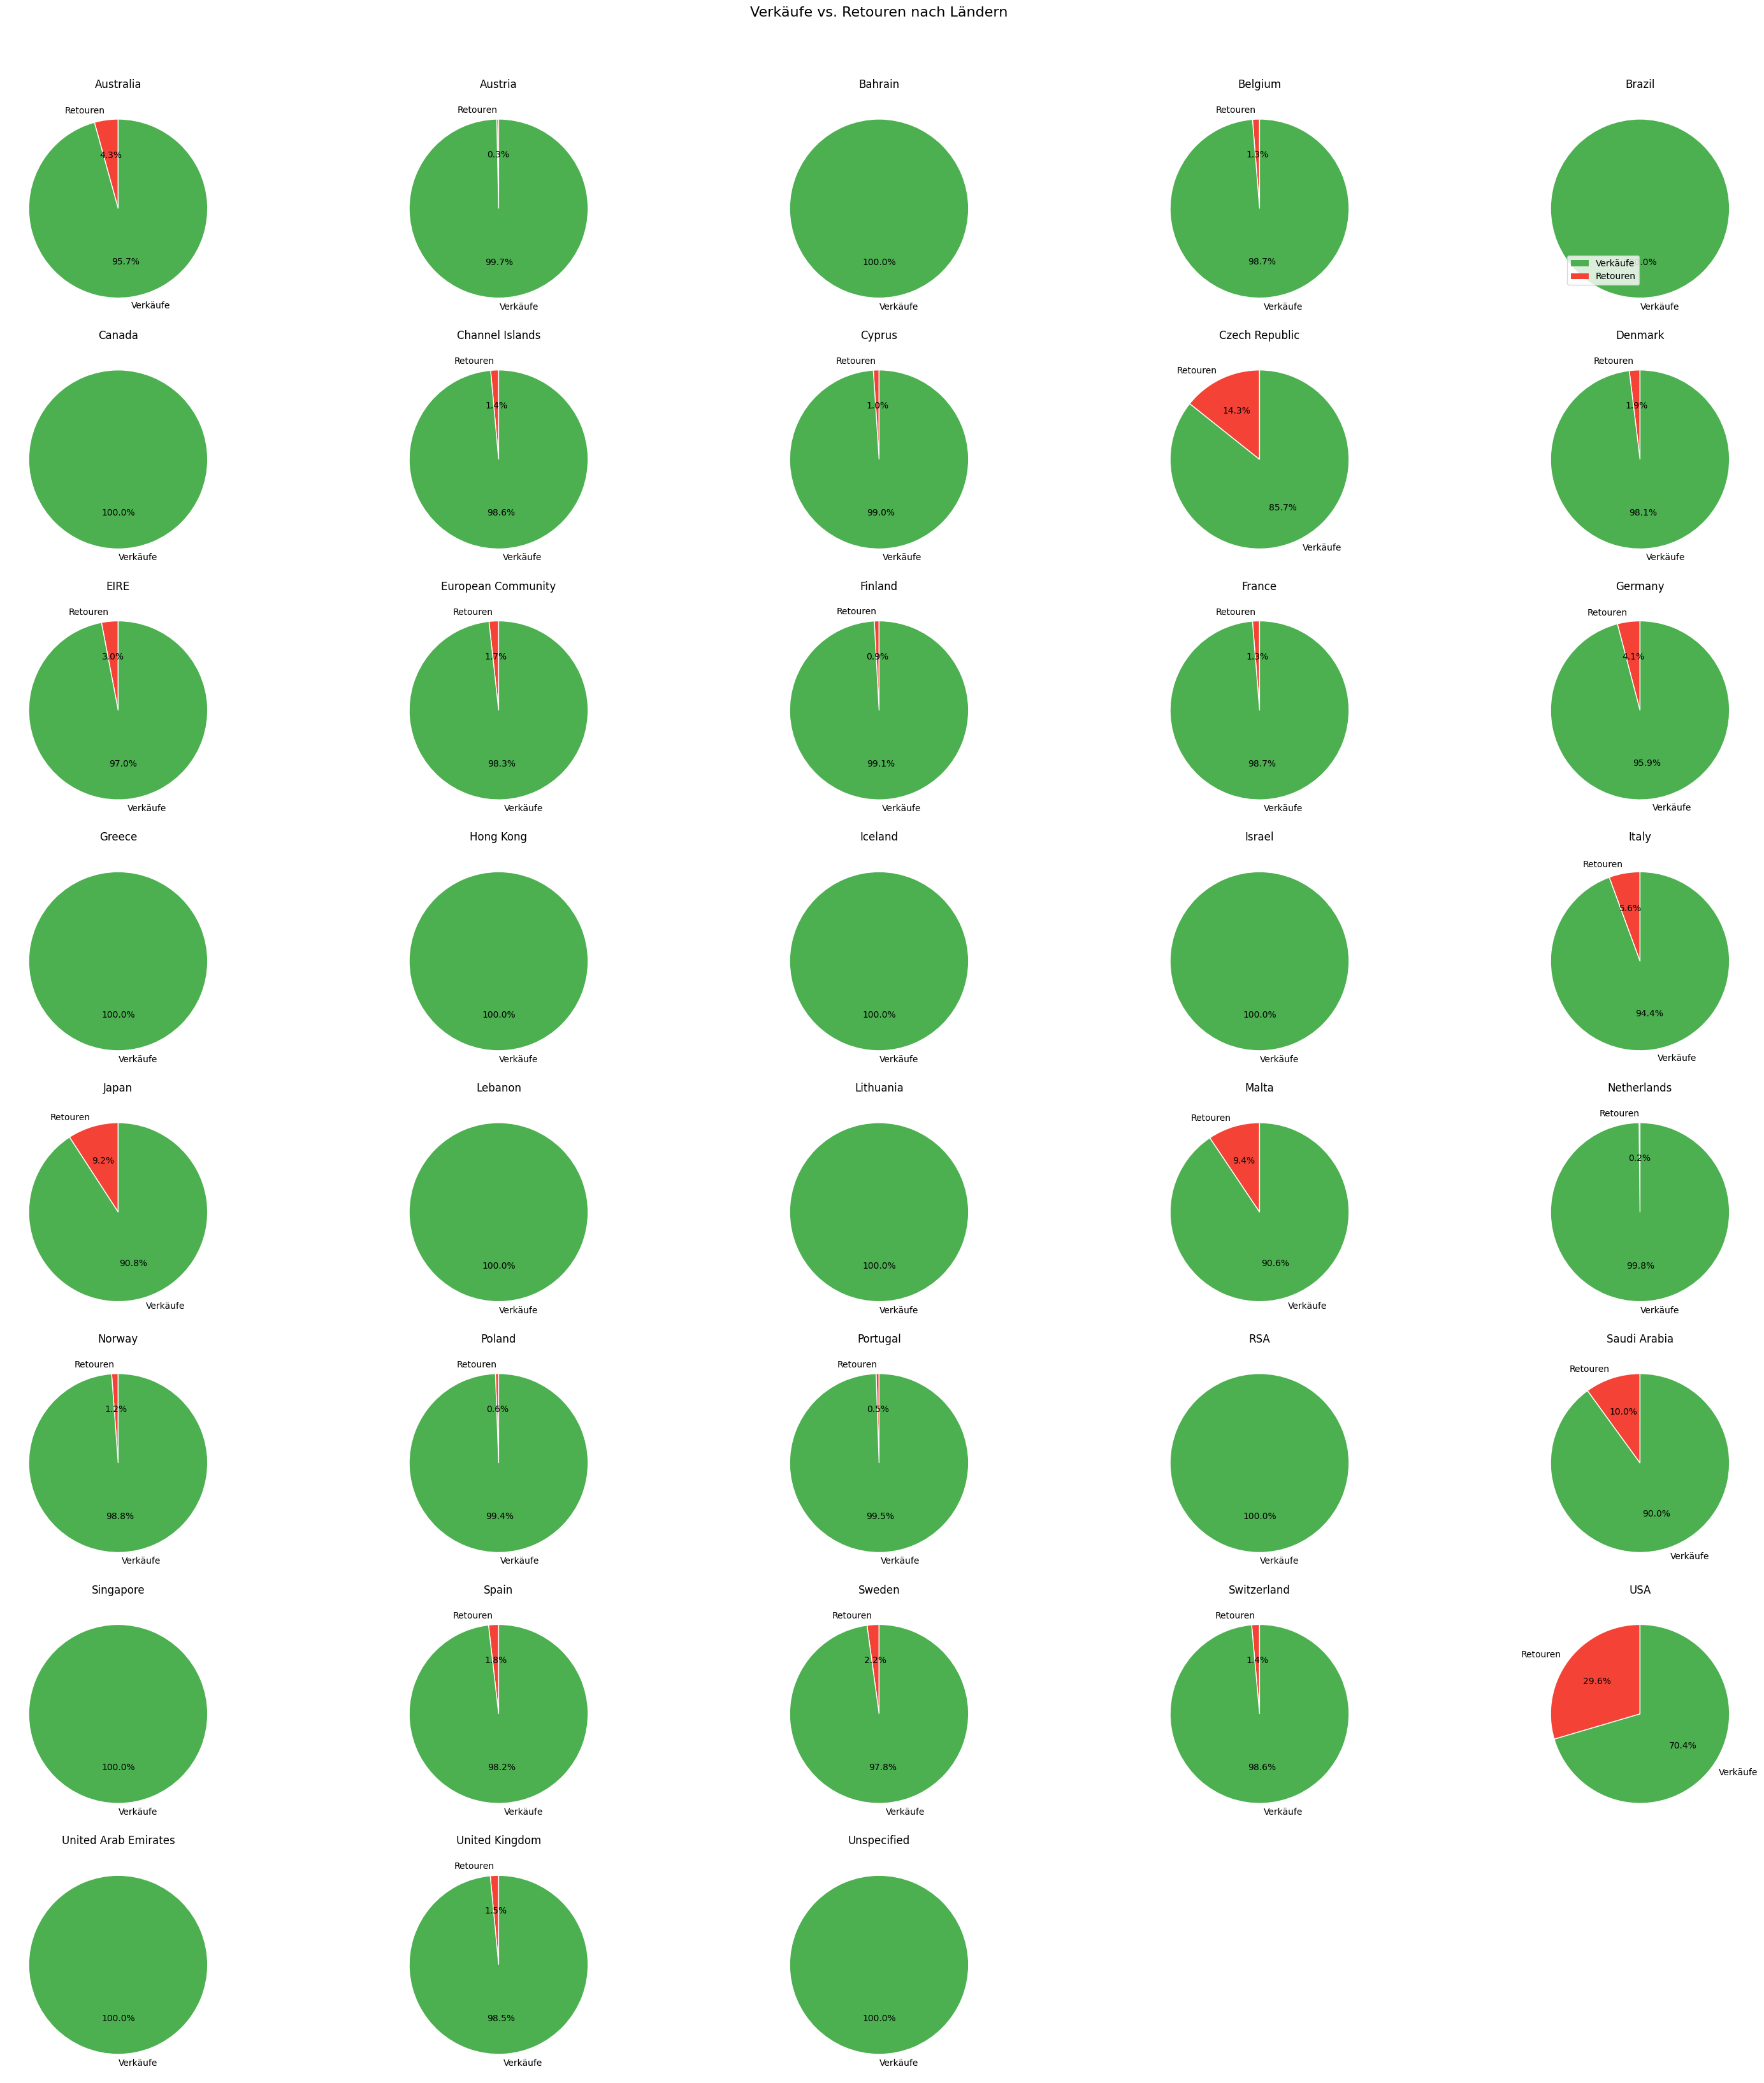

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Daten vorbereiten
plot_data = df.groupby(['Country', 'Sales']).size().reset_index(name='Count')
plot_data['Transaktionstyp'] = plot_data['Sales'].map({True: 'Verkäufe', False: 'Retouren'})

# Farbpalette definieren
palette = {'Verkäufe': '#4CAF50',  # Grün
           'Retouren': '#F44336'}   # Rot

# FacetGrid erstellen
g = sns.FacetGrid(plot_data, 
                  col='Country',
                  col_wrap=5,      # <= 5 Diagramme pro Zeile
                  height=4, 
                  aspect=1.5,
                  sharex=False,
                  sharey=False)

# Pie-Charts für jedes Land erstellen
g.map_dataframe(lambda data, **kwargs: 
                plt.pie(data['Count'],
                       labels=data['Transaktionstyp'],
                       colors=[palette[x] for x in data['Transaktionstyp']],
                       autopct='%1.1f%%',
                       startangle=90,
                       wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
                       textprops={'fontsize': 10}))

# Titel und Layout anpassen
g.set_titles("{col_name}", size=12, pad=10)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Verkäufe vs. Retouren nach Ländern', fontsize=16, y=1.02)

# Legende hinzufügen
legend_elements = [Patch(facecolor=palette['Verkäufe'], label='Verkäufe'),
                   Patch(facecolor=palette['Retouren'], label='Retouren')]
g.fig.legend(handles=legend_elements, 
             loc='upper right', 
             bbox_to_anchor=(0.9, 0.9),
             frameon=True)

# Anpassungen für bessere Lesbarkeit
plt.tight_layout()

# Diagramm anzeigen
plt.show()

In [39]:
country_sorted = sorted(df['Country'].unique())
print(country_sorted)

['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada', 'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE', 'European Community', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'RSA', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'USA', 'United Arab Emirates', 'United Kingdom', 'Unspecified']


In [ ]:
# CHURN RATE
# datum korrekt formatieren
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# monat extrahieren
df['YearMonth'] = df['Date'].dt.to_period('M')

# alle aktiven kunden pro Monat
kunden_pro_monat = df.groupby('YearMonth')['CustomerNo'].unique()

# 4. Berechne Churn zwischen zwei Monaten
churn_rates = {}

for i in range(len(kunden_pro_monat)-1):
    monat_aktuell = kunden_pro_monat.iloc[i]
    monat_naechst = kunden_pro_monat.iloc[i+1]

    churned = set(monat_aktuell) - set(monat_naechst)
    churn_rate = len(churned) / len(monat_aktuell)
    
    monat = str(kunden_pro_monat.index[i + 1])
    churn_rates[monat] = round(churn_rate, 3)

# 5. Ausgabe
print("Monatliche Churn Rate:")
for monat, rate in churn_rates.items():
    print(f"{monat}: {rate*100:.1f}%")

# 2019-01: 65.0% aus Dezember sind im Januar nicht zurückgekehrt !

Monatliche Churn Rate:
2019-01: 65.0%
2019-02: 64.1%
2019-03: 58.9%
2019-04: 67.5%
2019-05: 57.8%
2019-06: 58.1%
2019-07: 61.9%
2019-08: 59.0%
2019-09: 54.1%
2019-10: 57.8%
2019-11: 52.0%
2019-12: 74.3%


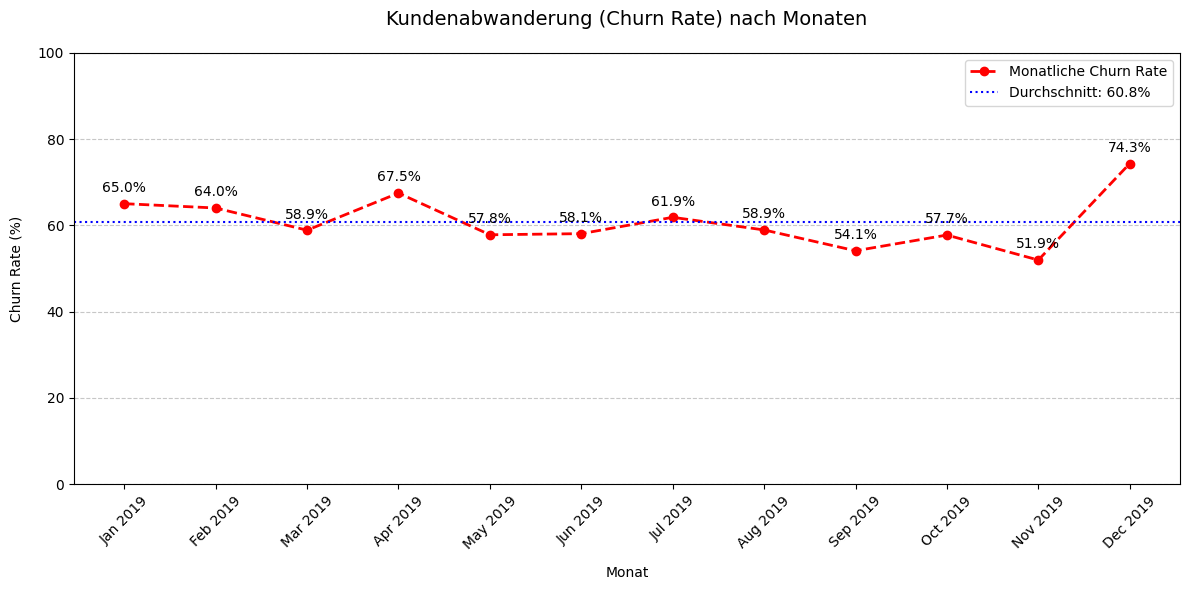

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Daten vorbereiten
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['YearMonth'] = df['Date'].dt.to_period('M')

# 2. Churn Rate berechnen
kunden_pro_monat = df.groupby('YearMonth')['CustomerNo'].unique()
churn_rates = {}
months = []

for i in range(len(kunden_pro_monat)-1):
    current_month = kunden_pro_monat.iloc[i]
    next_month = kunden_pro_monat.iloc[i+1]
    
    churned = set(current_month) - set(next_month)
    churn_rate = len(churned) / len(current_month)
    
    month_name = kunden_pro_monat.index[i+1].strftime('%b %Y')
    months.append(month_name)
    churn_rates[month_name] = round(churn_rate, 4)

# 3. Visualisierung
plt.figure(figsize=(12, 6))

# Linienplot mit Label für die Legende
line = plt.plot(months, 
                [x*100 for x in churn_rates.values()],
                marker='o',
                color='red',
                linestyle='--',
                linewidth=2,
                label='Monatliche Churn Rate')  # Dieses Label war vorher fehlend

# Durchschnittslinie
avg_line = plt.axhline(y=pd.Series(churn_rates.values()).mean()*100,
                       color='blue',
                       linestyle=':',
                       label=f'Durchschnitt: {pd.Series(churn_rates.values()).mean()*100:.1f}%')

# Diagrammgestaltung
plt.title('Kundenabwanderung (Churn Rate) nach Monaten', pad=20, fontsize=14)
plt.xlabel('Monat', labelpad=10)
plt.ylabel('Churn Rate (%)', labelpad=10)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Wertebeschriftung
for x, y in zip(months, [x*100 for x in churn_rates.values()]):
    plt.text(x, y+2, f'{y:.1f}%', ha='center', va='bottom')

# Legende anzeigen
plt.legend(loc='upper right', frameon=True)

plt.tight_layout()
plt.show()

In [45]:
# umsatz tag/woche/Monat 
# Datum korrekt parsen (falls noch nicht geschehen)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Umsatz-Spalte erzeugen
df['Revenue'] = df['Price'] * df['Quantity']

# Nur positive Umsätze (Retouren ausschließen)
df_clean = df[df['Quantity'] > 0]

In [46]:
# Umsatz pro Tag
umsatz_pro_tag = df_clean.groupby(df_clean['Date'].dt.date)['Revenue'].sum()
umsatz_pro_tag

Date
2018-12-01     326820.08
2018-12-02     367316.62
2018-12-03     206313.62
2018-12-05     197565.27
2018-12-06     273420.10
                 ...    
2019-12-05     289050.50
2019-12-06     197440.51
2019-12-07     264266.66
2019-12-08     223265.49
2019-12-09    1106069.97
Name: Revenue, Length: 305, dtype: float64

In [47]:
# Umsatz pro Woche
umsatz_pro_woche = df_clean.groupby(df_clean['Date'].dt.to_period('W'))['Revenue'].sum()
umsatz_pro_woche.head()

Date
2018-11-26/2018-12-02     694136.70
2018-12-03/2018-12-09    1538508.25
2018-12-10/2018-12-16    1437963.93
2018-12-17/2018-12-23     744806.64
2018-12-31/2019-01-06     595234.78
Freq: W-SUN, Name: Revenue, dtype: float64

In [48]:
# Umsatz pro Monat
umsatz_pro_monat = df_clean.groupby(df_clean['Date'].dt.to_period('M'))['Revenue'].sum()
umsatz_pro_monat

Date
2018-12    4415415.52
2019-01    4559856.37
2019-02    3335017.18
2019-03    4398401.60
2019-04    3589497.88
2019-05    4578965.08
2019-06    4494648.81
2019-07    4593867.06
2019-08    4758356.02
2019-09    6628303.06
2019-10    7237417.36
2019-11    7861197.12
2019-12    2514949.28
Freq: M, Name: Revenue, dtype: float64

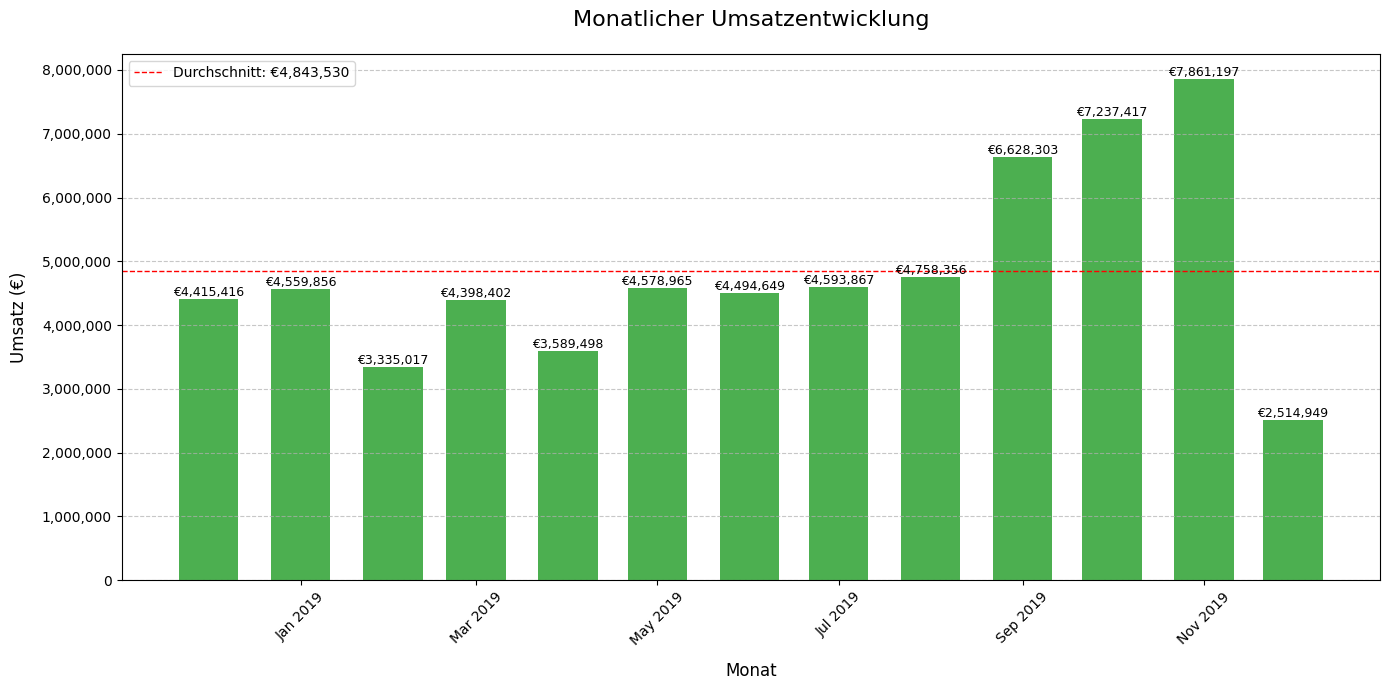

In [52]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Daten vorbereiten
umsatz_pro_monat = df_clean.groupby(df_clean['Date'].dt.to_period('M'))['Revenue'].sum()
umsatz_df = umsatz_pro_monat.reset_index()
umsatz_df['Date'] = umsatz_df['Date'].dt.to_timestamp()  # Für bessere Darstellung

# Visualisierung
plt.figure(figsize=(14, 7))

# Balkendiagramm erstellen
bars = plt.bar(umsatz_df['Date'], 
               umsatz_df['Revenue'], 
               color='#4CAF50',  # Grün für Umsatz
               width=20)  # Balkenbreite anpassen

# Diagramm gestalten
plt.title('Monatlicher Umsatzentwicklung', fontsize=16, pad=20)
plt.xlabel('Monat', fontsize=12, labelpad=10)
plt.ylabel('Umsatz (€)', fontsize=12, labelpad=10)

# X-Achse formatieren
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Y-Achse formatieren (Tausendertrennzeichen)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Werte über den Balken anzeigen
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'€{height:,.0f}',
             ha='center', va='bottom', fontsize=9)

# Hilfslinien
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Durchschnittslinie
avg = umsatz_df['Revenue'].mean()
plt.axhline(y=avg, color='red', linestyle='--', linewidth=1, 
            label=f'Durchschnitt: €{avg:,.0f}')
plt.legend()

plt.tight_layout()
plt.show()

In [53]:
# Umsatz pro Jahr
umsatz_pro_jahr = df_clean.groupby(df_clean['Date'].dt.to_period('Y'))['Revenue'].sum()
umsatz_pro_jahr

Date
2018     4415415.52
2019    58550476.82
Freq: Y-DEC, Name: Revenue, dtype: float64

In [55]:
# Durchschnittlicher Preis pro Monat
avg_price_monat = df_clean.groupby(df_clean['Date'].dt.to_period('M'))['Price'].mean()
avg_price_monat

Date
2018-12    14.101136
2019-01    13.568424
2019-02    13.672189
2019-03    13.594603
2019-04    13.383292
2019-05    13.290391
2019-06    13.232658
2019-07    12.846335
2019-08    12.895464
2019-09    12.957153
2019-10    13.090300
2019-11    11.062029
2019-12     6.503101
Freq: M, Name: Price, dtype: float64

In [56]:
# top 20 bestseller
# Nur gültige Verkäufe (positive Menge)
df_clean = df[df['Quantity'] > 0]

# Verkaufsmenge pro Produkt aggregieren
bestseller = df_clean.groupby('ProductNo')['Quantity'].sum().sort_values(ascending=False)

# Top 20 Bestseller
bestseller_top20 = df_clean.groupby(['ProductNo', 'ProductName'])['Quantity'] \
                .sum().sort_values(ascending=False).head(20)

bestseller_top20

ProductNo  ProductName                       
23843      Paper Craft Little Birdie             80995
23166      Medium Ceramic Top Storage Jar        78033
22197      Popcorn Holder                        56921
84077      World War 2 Gliders Asstd Designs     55047
85099B     Jumbo Bag Red Retrospot               48478
85123A     Cream Hanging Heart T-Light Holder    37956
21212      Pack Of 72 Retrospot Cake Cases       36515
84879      Assorted Colour Bird Ornament         36493
23084      Rabbit Night Light                    30788
22492      Mini Paint Set Vintage                26633
22616      Pack Of 12 London Tissues             26135
21977      Pack Of 60 Pink Paisley Cake Cases    24854
22178      Victorian Glass Hanging T-Light       24304
15036      Assorted Colours Silk Fan             23826
17003      Brocade Ring Purse                    23056
21915      Red Harmonica In Box                  21937
22386      Jumbo Bag Pink Polkadot               21465
23203      Jumbo Ba

In [58]:
# cross sell rate
cross_sell_rate = (upt_pro_bon['UnitsPerTransaction'] > 2).mean()

# up sell rate
up_sell_rate = upt_pro_bon['UnitsPerTransaction'].gt(2).sum() / df_clean['ProductNo'].nunique()

print(up_sell_rate)
print(cross_sell_rate)


5.169730881961097
0.9804436808327859


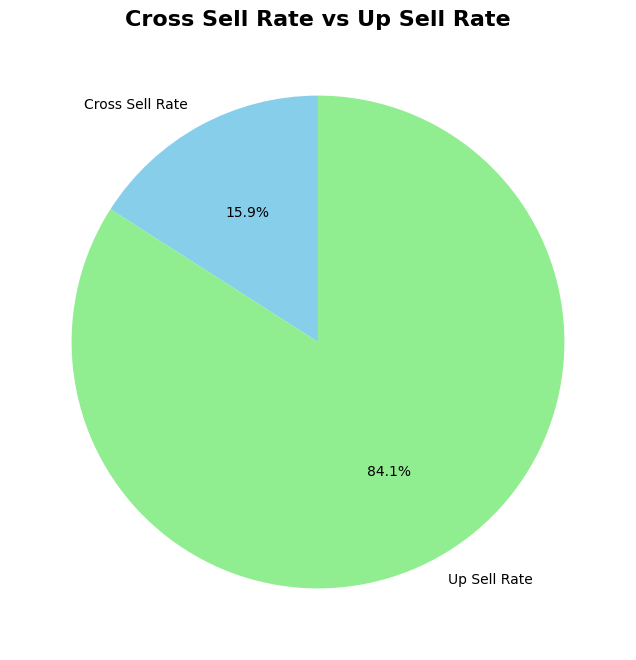

In [60]:
# Werte für das Kuchendiagramm
labels = ['Cross Sell Rate', 'Up Sell Rate']
values = [cross_sell_rate, up_sell_rate]

# Erstellen des Kuchendiagramms
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])

# Titel hinzufügen
ax.set_title('Cross Sell Rate vs Up Sell Rate', fontsize=16, fontweight='bold')

# Diagramm anzeigen
plt.show()

In [ ]:
# Aggregating data to find the top 100 customers
top_customers = df_clean.groupby('CustomerNo').agg({
    'TransactionNo': 'nunique',  # Count unique transactions
    'Date': 'min'  # Earliest transaction date
}).sort_values(by=['TransactionNo', 'Date'], ascending=[False, True]).head(20)

top_customers

,TransactionNo,Date
CustomerNo,,
12748.0,207,2018-12-01
14911.0,198,2018-12-01
17841.0,125,2018-12-01
13089.0,98,2018-12-05
15311.0,91,2018-12-01
14606.0,90,2018-12-01
12971.0,86,2018-12-02
14646.0,73,2018-12-20
13408.0,62,2018-12-01


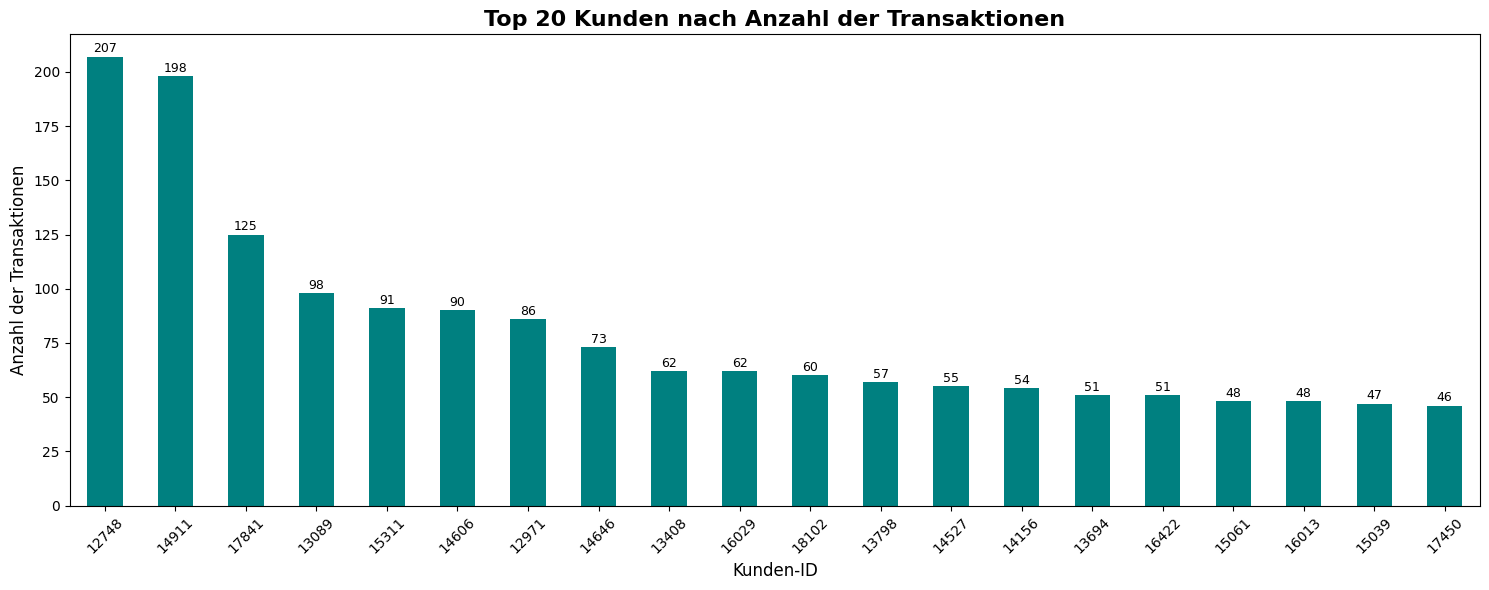

In [62]:


# Visualisierung der Top 20 Kunden als Balkendiagramm
fig, ax = plt.subplots(figsize=(15, 6))
top_customers['TransactionNo'].plot(kind='bar', color='teal', ax=ax)

# Titel und Achsenbeschriftungen hinzufügen
ax.set_title('Top 20 Kunden nach Anzahl der Transaktionen', fontsize=16, fontweight='bold')
ax.set_xlabel('Kunden-ID', fontsize=12)
ax.set_ylabel('Anzahl der Transaktionen', fontsize=12)

# Achsenbeschriftungen anpassen
ax.set_xticks(range(len(top_customers)))
ax.set_xticklabels(top_customers.index.astype(int), rotation=45, fontsize=10)

# Werte über den Balken anzeigen
for i, v in enumerate(top_customers['TransactionNo']):
    ax.text(i, v + 2, str(v), ha='center', fontsize=9)

# Layout anpassen und Diagramm anzeigen
plt.tight_layout()
plt.show()

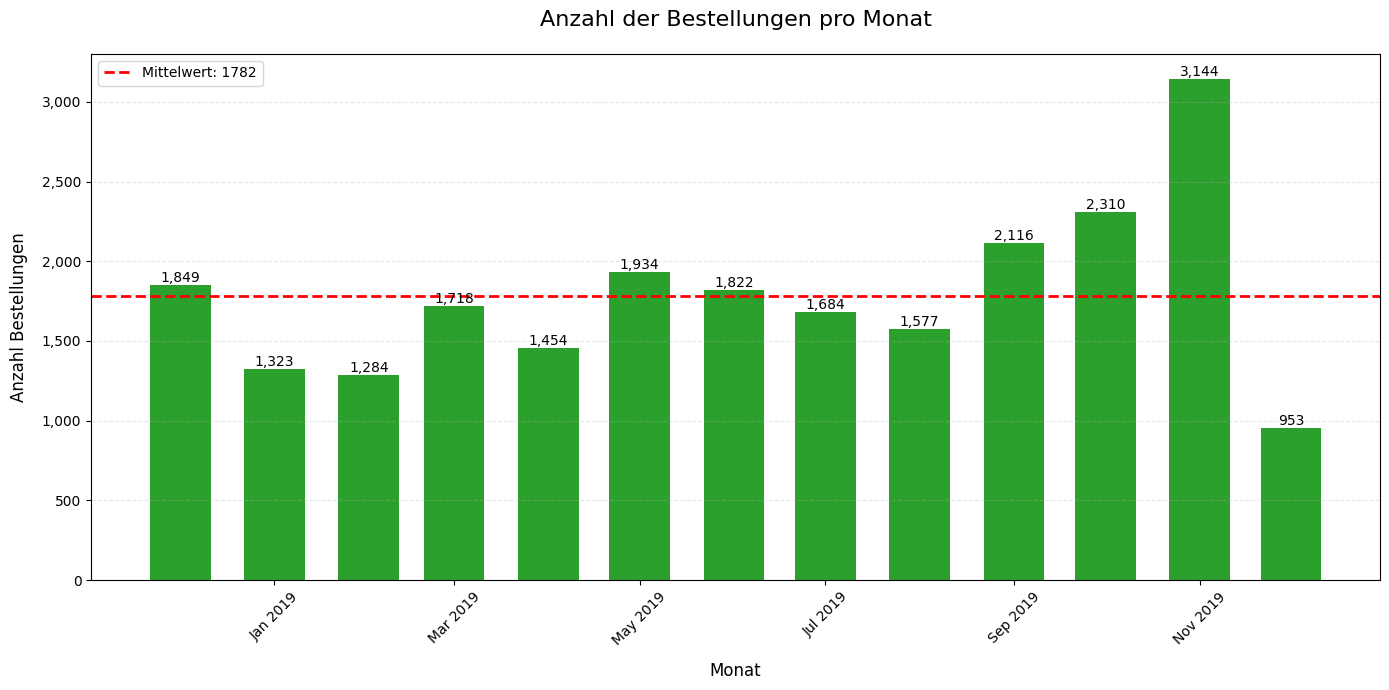

In [72]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Mittelwert berechnen
mean_value = bestellungen_pro_monat['TransactionNo'].mean()

plt.figure(figsize=(14, 7))

# Balken erstellen
bars = plt.bar(bestellungen_pro_monat['YearMonth'], 
               bestellungen_pro_monat['TransactionNo'],
               color='#2ca02c',
               width=20)

# Trendlinie für Mittelwert
plt.axhline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mittelwert: {mean_value:.0f}')

# Diagramm gestalten
plt.title('Anzahl der Bestellungen pro Monat', fontsize=16, pad=20)
plt.xlabel('Monat', fontsize=12, labelpad=10)
plt.ylabel('Anzahl Bestellungen', fontsize=12, labelpad=10)

# Achsen formatieren
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Werte anzeigen
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,.0f}',
             ha='center', va='bottom')

# Legende und Grid
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


# Dashboard

In [ ]:
# building dashboard in tableau public 